Text(0.5, 1.0, 'Original image')

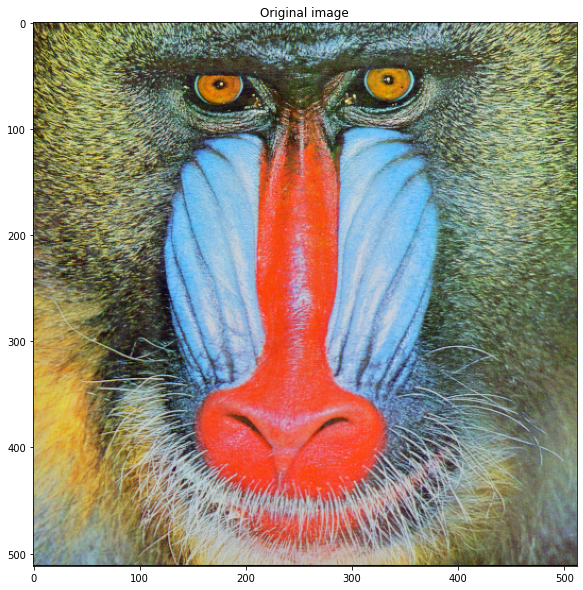

In [2]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://i.pinimg.com/originals/62/d9/95/62d995e13a183d457d284fecb8c3f0e1.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [16]:
rgb_scale = 255
cmyk_scale = 100

def rgb_to_cmyk(r,g,b):
    if (r == 0) and (g == 0) and (b == 0):
        # black
        return 0, 0, 0, cmyk_scale

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / float(rgb_scale)
    m = 1 - g / float(rgb_scale)
    y = 1 - b / float(rgb_scale)

    # extract out k [0,1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) 
    m = (m - min_cmy) 
    y = (y - min_cmy) 
    k = min_cmy

    # rescale to the range [0,cmyk_scale]
    return c*cmyk_scale, m*cmyk_scale, y*cmyk_scale, k*cmyk_scale

def cmyk_to_rgb(c,m,y,k):
    """
    """
    r = rgb_scale*(1.0-(c+k)/float(cmyk_scale))
    g = rgb_scale*(1.0-(m+k)/float(cmyk_scale))
    b = rgb_scale*(1.0-(y+k)/float(cmyk_scale))
    return r,g,b

In [22]:
def rgb_to_cmyk (img):
  # Get the image's height, width, and channels
  height,width,channel = img.shape

  # Create blank CMY image
  img_cmyk = np.zeros((height,width,3))

  # Create blank CMYK image
  img_cmyk = np.zeros((height,width,4))

  #CALCULATE
  for i in np.arange(height):
      for j in np.arange(width):
          r = img.item(i,j,0)
          g = img.item(i,j,1)
          b = img.item(i,j,2)

          # RGB to CMY
          c = 1 - (r/255.)
          m = 1 - (g/255.)
          y = 1 - (b/255.)

          # CMY to CMYK
          var_K = 1
          if (c < var_K): var_K = c
          if (m < var_K): var_K = m
          if (y < var_K): var_K = y
          if (var_K == 1):
              c = 0
              m = 0
              y = 0
          else:
              c = (c - var_K) / (1.-var_K)
              m = (m - var_K) / (1.-var_K)
              y = (y - var_K) / (1.-var_K)
          
          K = var_K

          img_cmyk.itemset((i,j,0),int(c*100))
          img_cmyk.itemset((i,j,1),int(m*100))
          img_cmyk.itemset((i,j,2),int(y*100))
          # write K to image
          img_cmyk.itemset((i,j,3),K)
  return img_cmyk
  #cv2.imwrite('image_cmyk.jpg',img_cmyk)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'CMYK Image')

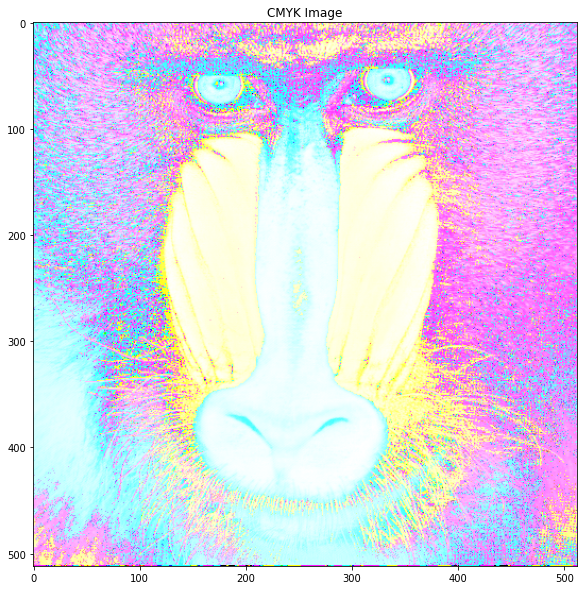

In [23]:
# Convert RGB image to CMYK image
img = np.asarray(img)
output_image = rgb_to_cmyk(img)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(output_image, cmap='gray', vmin=0, vmax=255)
plt.title("CMYK Image")